In [ ]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [215]:
duration = pd.read_csv('duration.csv', delimiter=";")
duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"5100,000000"
1,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"12240,000000"
2,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"4080,000000"
3,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"9120,000000"
4,25,S6,1.4021,399,300,30,"51,1980186835613",1,50501.0,"30600,000000"


In [216]:
duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                12687 non-null  int64  
 1   productcategory_id        12687 non-null  object 
 2   material_id               12687 non-null  object 
 3   outer_diameter            12687 non-null  object 
 4   inner_diameter            12687 non-null  int64  
 5   height                    12687 non-null  int64  
 6   weight                    12687 non-null  object 
 7   heattreatmentcategory_id  12687 non-null  int64  
 8   workplace_id              7348 non-null   float64
 9   duration_seconds          12687 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 991.3+ KB


In [217]:
# Remove commas or any non-numeric characters and convert to float
duration['outer_diameter'] = duration['outer_diameter'].str.replace(',', '').astype(float)
duration['weight'] = duration['weight'].str.replace(',', '').astype(float)
duration['duration_seconds'] = duration['duration_seconds'].str.replace(',', '').astype(float)
duration['material_id'] = pd.to_numeric(duration['material_id'], errors='coerce')

duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                12687 non-null  int64  
 1   productcategory_id        12687 non-null  object 
 2   material_id               11847 non-null  float64
 3   outer_diameter            12687 non-null  float64
 4   inner_diameter            12687 non-null  int64  
 5   height                    12687 non-null  int64  
 6   weight                    12687 non-null  float64
 7   heattreatmentcategory_id  12687 non-null  int64  
 8   workplace_id              7348 non-null   float64
 9   duration_seconds          12687 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 991.3+ KB


In [218]:
duration.describe()

,product_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
count,12687.000000,11847.000000,12687.000000,12687.000000,12687.000000,1.268700e+04,12687.000000,7348.000000,1.268700e+04
mean,3810.700796,1.462424,875.034760,454.651533,132.319146,3.513939e+14,1.494837,50764.726592,3.546999e+09
std,2047.595577,0.349043,4080.872342,334.329717,115.252568,2.586086e+14,1.674465,1575.460696,6.128239e+09
min,25.000000,1.003700,80.000000,10.000000,10.000000,-2.444892e+14,0.000000,50501.000000,0.000000e+00
25%,2029.500000,1.402100,360.000000,229.000000,52.000000,1.384454e+14,0.000000,50501.000000,3.600000e+08
50%,3871.000000,1.430100,514.000000,360.000000,94.000000,2.841005e+14,1.000000,50510.000000,1.140000e+09
75%,5629.000000,1.457100,736.000000,570.000000,180.000000,5.201703e+14,4.000000,50513.000000,4.020000e+09
max,7372.000000,3.723500,95818.000000,3147.000000,1550.000000,9.988278e+14,6.000000,70003.000000,8.628000e+10


In [219]:
duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,5.100000e+09
1,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,1.224000e+10
2,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,4.080000e+09
3,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,9.120000e+09
4,25,S6,1.4021,399.0,300,30,5.119802e+14,1,50501.0,3.060000e+10


In [247]:
stainless_steel_energy = pd.read_csv('stainless_steel_energy.csv',  delimiter=";")
stainless_steel_energy.head()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
0,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:25:00,58
1,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:26:00,58
2,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:27:00,58
3,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:28:00,58
4,S6,1.4021,399,30,"51,1980186835613",1,NaN,NaN,NaN,0,50513,25,2012-04-16 13:29:00,58


In [248]:
stainless_steel_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   productcategory_id          40582 non-null  object 
 1   material_id                 40582 non-null  object 
 2   outer_diameter              40582 non-null  object 
 3   height                      40582 non-null  int64  
 4   weight                      40582 non-null  object 
 5   heattreatmentcategory_id    40582 non-null  int64  
 6   heattreatment_temperatures  0 non-null      float64
 7   forming_temperatures        0 non-null      float64
 8   dimension                   0 non-null      float64
 9   input_weight                40582 non-null  int64  
 10  workplace_id                40582 non-null  int64  
 11  product_id                  40582 non-null  int64  
 12  mes_datetime                40582 non-null  object 
 13  value                       405

In [249]:
stainless_steel_energy['mes_datetime'] = pd.to_datetime(stainless_steel_energy['mes_datetime'], errors='coerce')
stainless_steel_energy['outer_diameter'] = stainless_steel_energy['outer_diameter'].str.replace(',', '').astype(float)
stainless_steel_energy['weight'] = duration['weight'].replace(',', '').astype(float)
stainless_steel_energy['material_id'] = pd.to_numeric(duration['material_id'], errors='coerce')

In [250]:
stainless_steel_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   productcategory_id          40582 non-null  object        
 1   material_id                 6840 non-null   float64       
 2   outer_diameter              40582 non-null  float64       
 3   height                      40582 non-null  int64         
 4   weight                      6840 non-null   float64       
 5   heattreatmentcategory_id    40582 non-null  int64         
 6   heattreatment_temperatures  0 non-null      float64       
 7   forming_temperatures        0 non-null      float64       
 8   dimension                   0 non-null      float64       
 9   input_weight                40582 non-null  int64         
 10  workplace_id                40582 non-null  int64         
 11  product_id                  40582 non-null  int64     

In [251]:

stainless_steel_energy.describe()

,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
count,6840.000000,40582.000000,40582.000000,6.840000e+03,40582.000000,0.0,0.0,0.0,40582.0,40582.000000,40582.000000,40582,40582.000000
mean,1.430515,1073.778128,132.631783,3.539710e+14,1.326894,NaN,NaN,NaN,0.0,50513.277882,3814.841063,2012-06-27 10:43:21.785298944,81.314400
min,1.003700,122.000000,10.000000,-2.444892e+14,0.000000,NaN,NaN,NaN,0.0,50512.000000,25.000000,2012-01-19 14:00:00,0.000000
25%,1.400600,400.000000,50.000000,1.386775e+14,0.000000,NaN,NaN,NaN,0.0,50513.000000,2209.000000,2012-04-18 07:20:00,55.000000
50%,1.411200,559.000000,90.000000,2.841005e+14,1.000000,NaN,NaN,NaN,0.0,50513.000000,3864.500000,2012-07-02 16:35:30,72.000000
75%,1.454100,800.000000,173.000000,5.273150e+14,2.000000,NaN,NaN,NaN,0.0,50513.000000,5577.000000,2012-09-07 16:31:45,87.000000
max,3.723500,95818.000000,1550.000000,9.988278e+14,6.000000,NaN,NaN,NaN,0.0,50516.000000,7356.000000,2012-11-15 06:41:00,421.000000
std,0.335699,5330.570185,138.827791,2.615196e+14,1.605781,NaN,NaN,NaN,0.0,0.678670,2007.319572,NaN,56.750031


In [252]:
duration.shape, stainless_steel_energy.shape

((6840, 10), (40582, 14))

In [253]:
stainless_steel_energy.isnull().sum()

productcategory_id                0
material_id                   33742
outer_diameter                    0
height                            0
weight                        33742
heattreatmentcategory_id          0
heattreatment_temperatures    40582
forming_temperatures          40582
dimension                     40582
input_weight                      0
workplace_id                      0
product_id                        0
mes_datetime                      0
value                             0
dtype: int64

In [227]:
duration.isnull().sum()

product_id                     0
productcategory_id             0
material_id                  840
outer_diameter                 0
inner_diameter                 0
height                         0
weight                         0
heattreatmentcategory_id       0
workplace_id                5339
duration_seconds               0
dtype: int64

<Axes: >

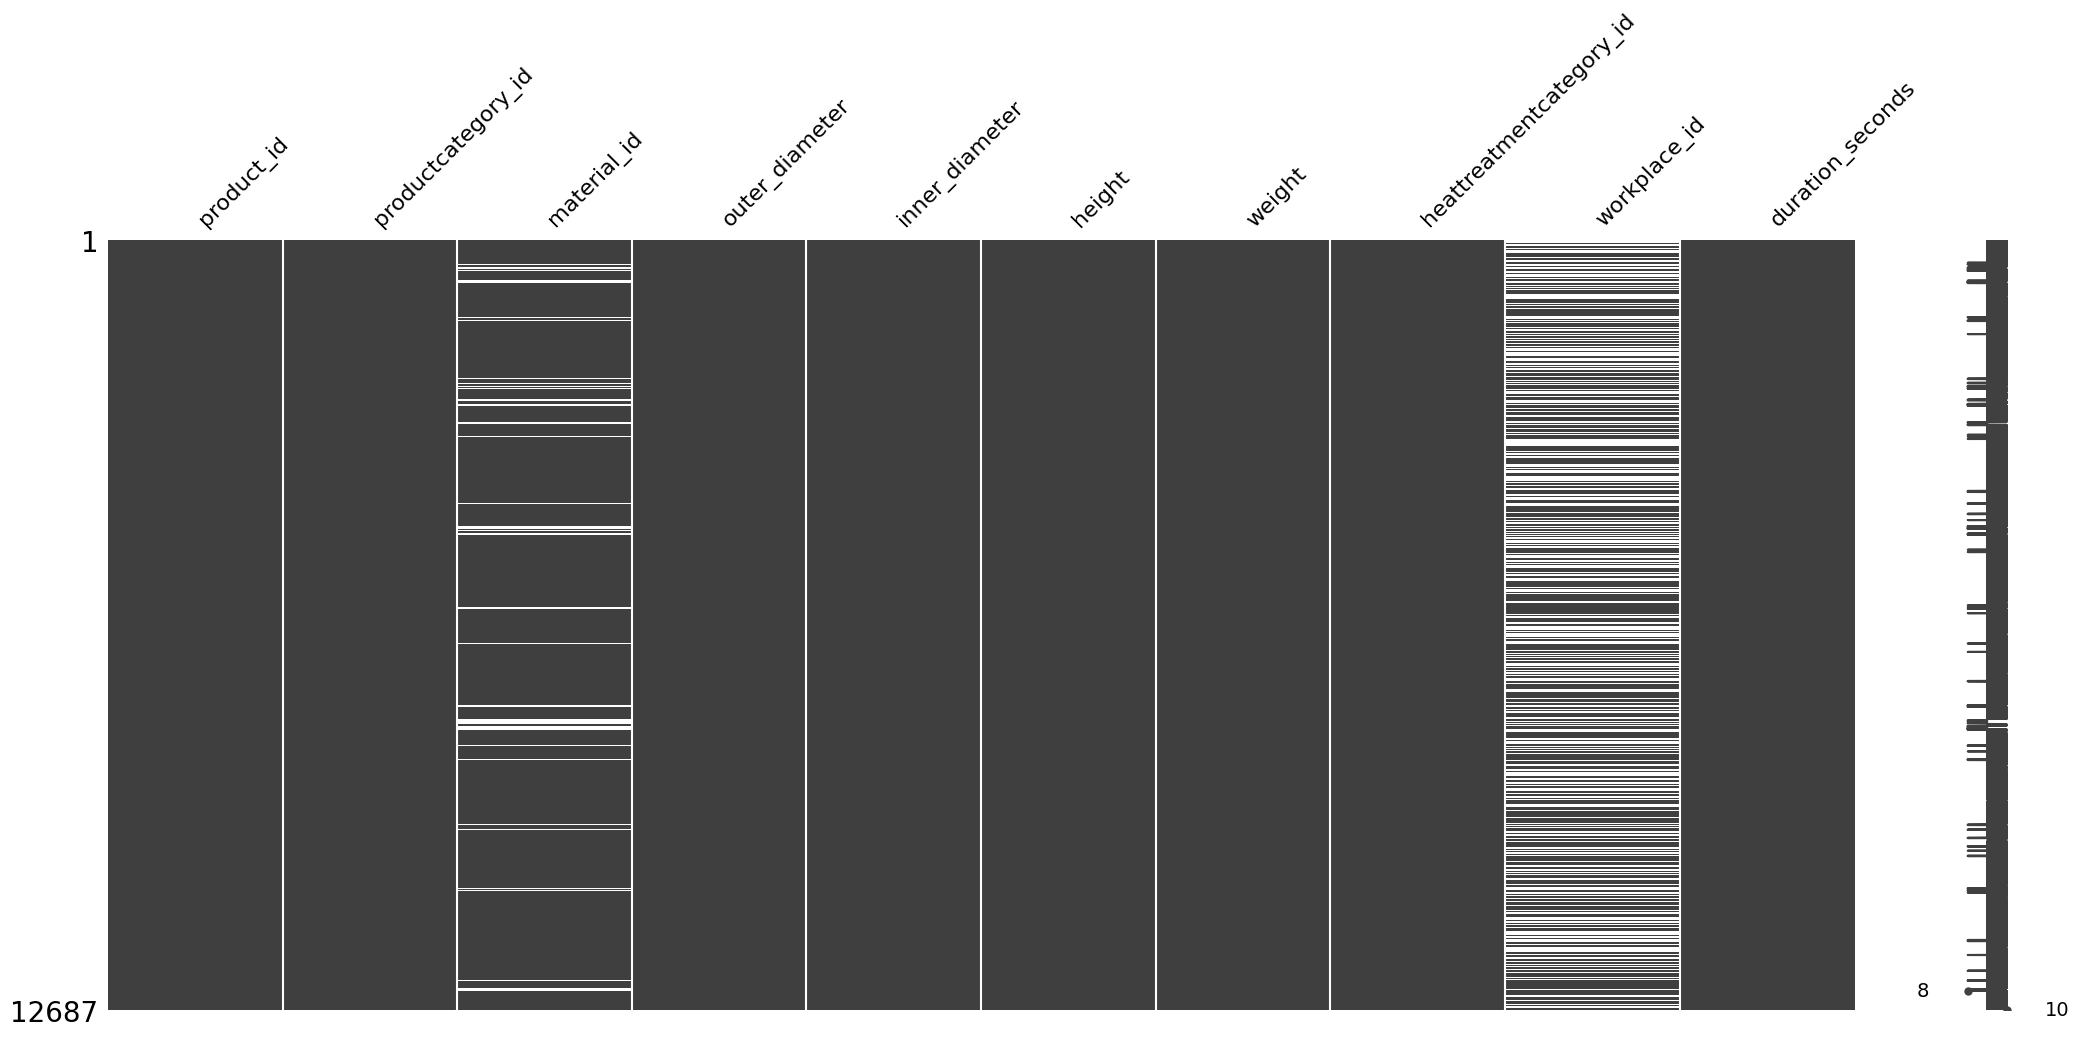

In [228]:
msno.matrix(duration)

<Axes: >

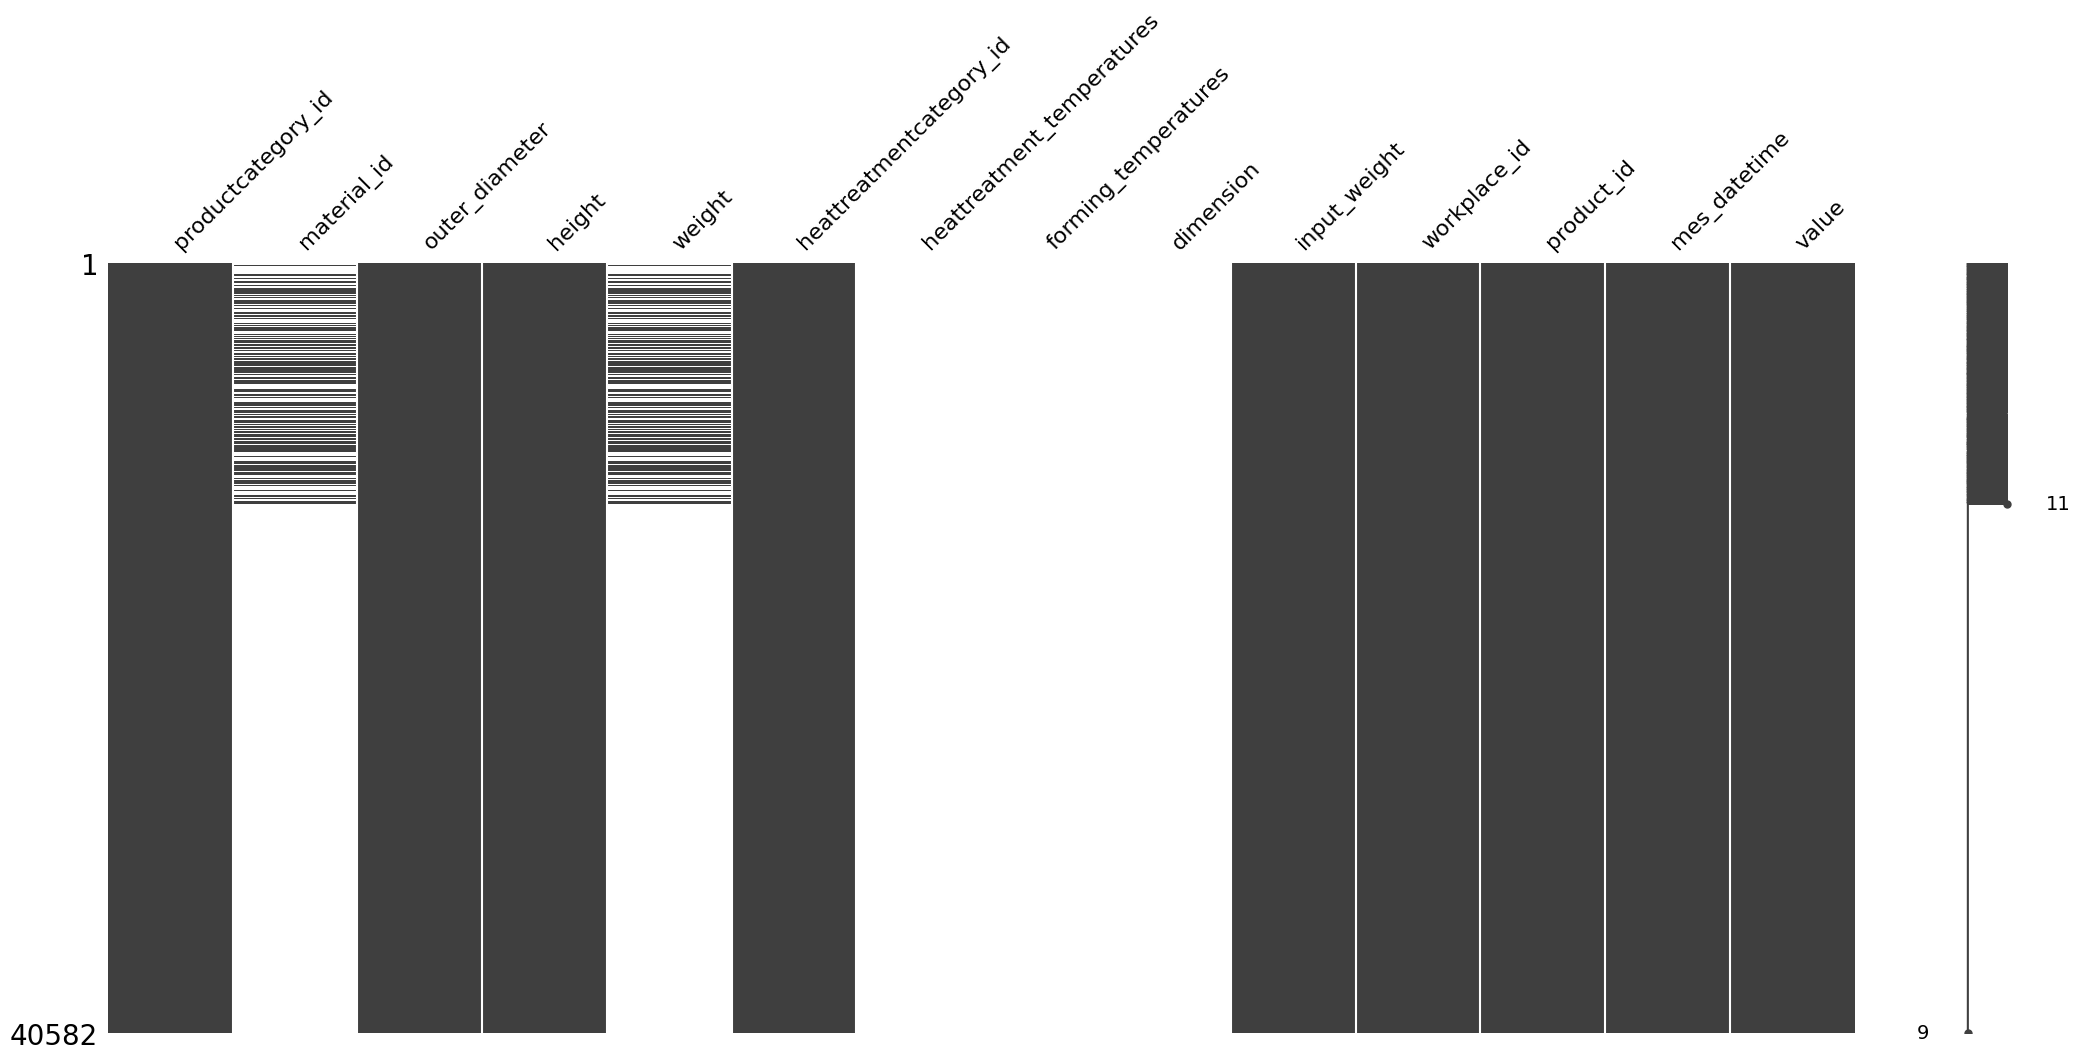

In [254]:
msno.matrix(stainless_steel_energy)

In [230]:
#dropping null values
# Drop rows with missing values in any column
duration = duration.dropna()
duration.isnull().sum()


product_id                  0
productcategory_id          0
material_id                 0
outer_diameter              0
inner_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
duration_seconds            0
dtype: int64

In [255]:
stainless_steel_energy = stainless_steel_energy.drop(columns=['heattreatment_temperatures','forming_temperatures','dimension','input_weight'])
stainless_steel_energy.isnull().sum()

productcategory_id              0
material_id                 33742
outer_diameter                  0
height                          0
weight                      33742
heattreatmentcategory_id        0
workplace_id                    0
product_id                      0
mes_datetime                    0
value                           0
dtype: int64

In [259]:
stainless_steel_energy = stainless_steel_energy.dropna(subset=['material_id', 'weight'])
stainless_steel_energy.isnull().sum()

productcategory_id          0
material_id                 0
outer_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
product_id                  0
mes_datetime                0
value                       0
dtype: int64

In [260]:
stainless_steel_energy.shape

(6840, 10)

In [261]:
stainless_steel_energy.head()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,workplace_id,product_id,mes_datetime,value
0,S6,1.4021,399.0,30,5.119802e+14,1,50513,25,2012-04-16 13:25:00,58
1,S6,1.4021,399.0,30,5.119802e+14,1,50513,25,2012-04-16 13:26:00,58
2,S6,1.4021,399.0,30,5.119802e+14,1,50513,25,2012-04-16 13:27:00,58
3,S6,1.4021,399.0,30,5.119802e+14,1,50513,25,2012-04-16 13:28:00,58
4,S6,1.4021,399.0,30,5.119802e+14,1,50513,25,2012-04-16 13:29:00,58


In [262]:
duration.duplicated().sum()

np.int64(120)

In [263]:
duration.drop_duplicates

<bound method DataFrame.drop_duplicates of        product_id productcategory_id  material_id  outer_diameter  \
0              25                 S6       1.4021           399.0   
1              25                 S6       1.4021           399.0   
2              25                 S6       1.4021           399.0   
3              25                 S6       1.4021           399.0   
4              25                 S6       1.4021           399.0   
...           ...                ...          ...             ...   
12682        7361                 S1       2.4856           394.0   
12683        7362                 S1       1.3964           950.0   
12684        7365                 S1       2.4856           285.0   
12685        7366                 S1       2.4856           219.0   
12686        7372                 S1       1.4301           300.0   

       inner_diameter  height        weight  heattreatmentcategory_id  \
0                 300      30  5.119802e+14            

In [264]:
stainless_steel_energy.duplicated().sum()

np.int64(20)

In [265]:
duration.dtypes

product_id                    int64
productcategory_id           object
material_id                 float64
outer_diameter              float64
inner_diameter                int64
height                        int64
weight                      float64
heattreatmentcategory_id      int64
workplace_id                float64
duration_seconds            float64
dtype: object

In [266]:
stainless_steel_energy.dtypes

productcategory_id                  object
material_id                        float64
outer_diameter                     float64
height                               int64
weight                             float64
heattreatmentcategory_id             int64
workplace_id                         int64
product_id                           int64
mes_datetime                datetime64[ns]
value                                int64
dtype: object

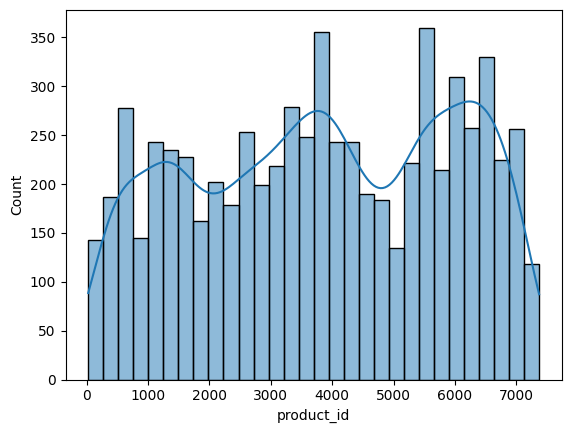

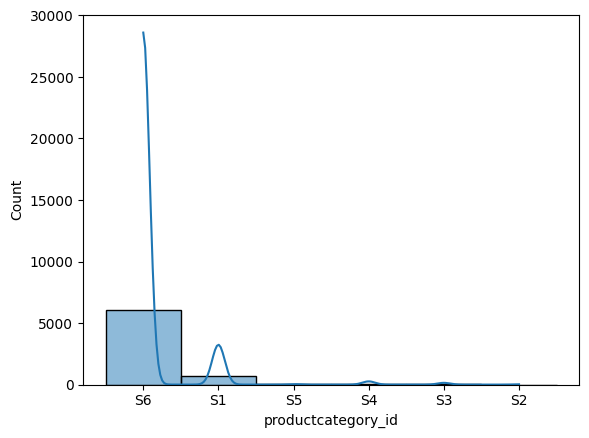

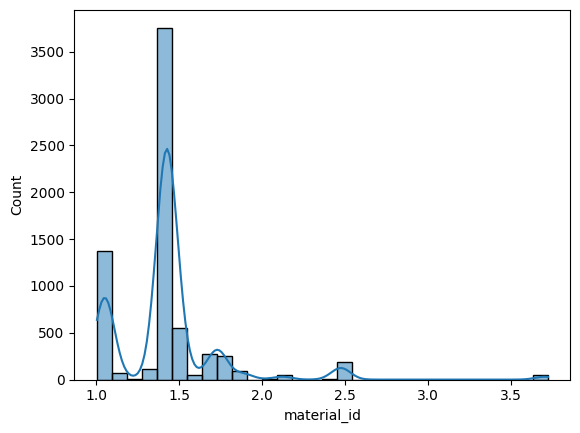

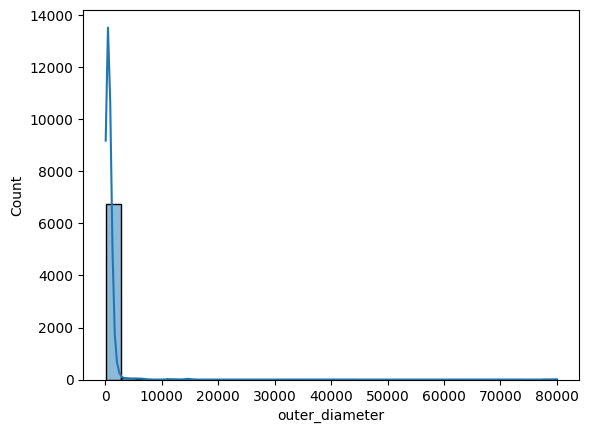

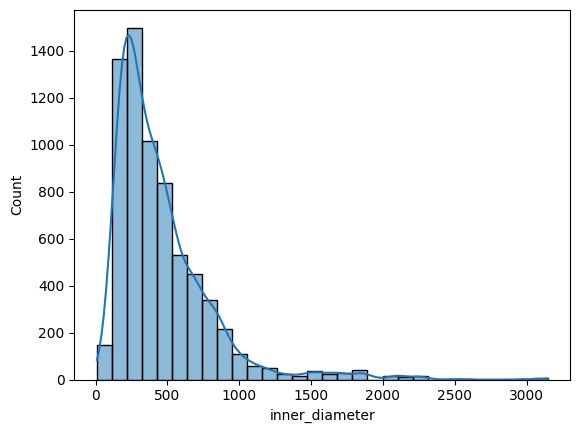

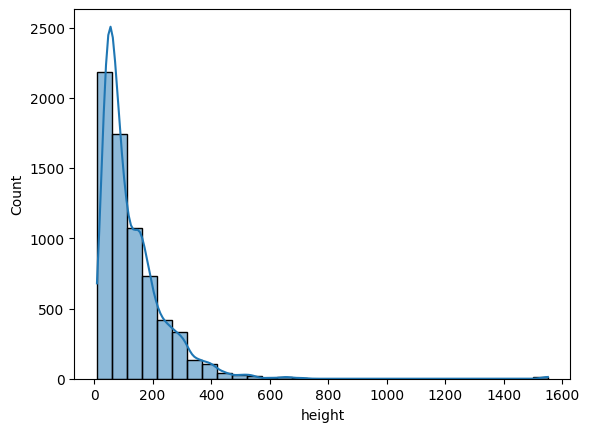

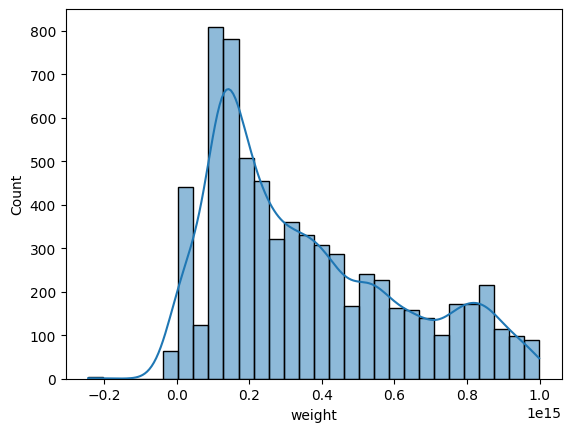

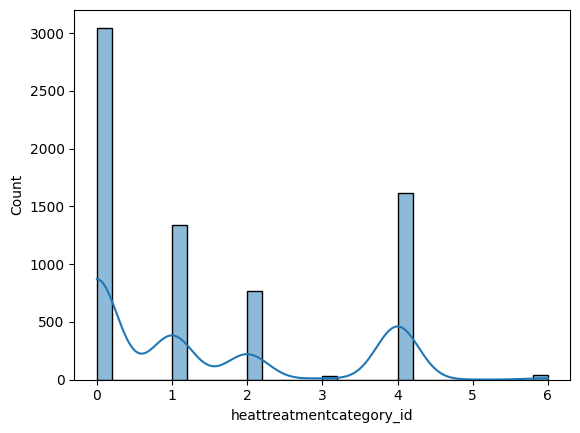

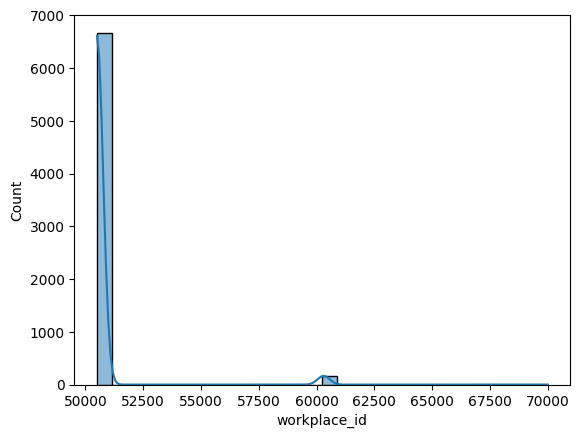

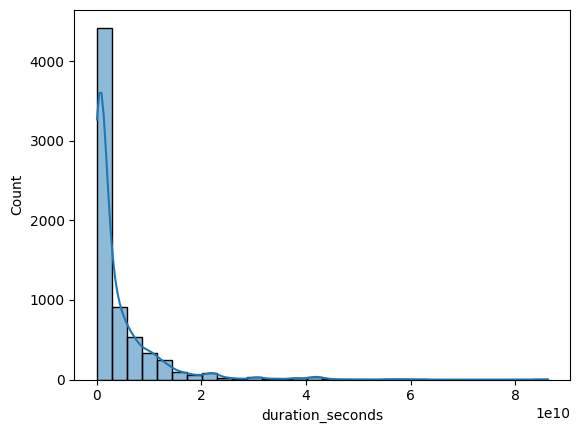

In [268]:
for col in duration.columns:
    sns.histplot(duration[col], bins=30, kde=True)
    plt.show()

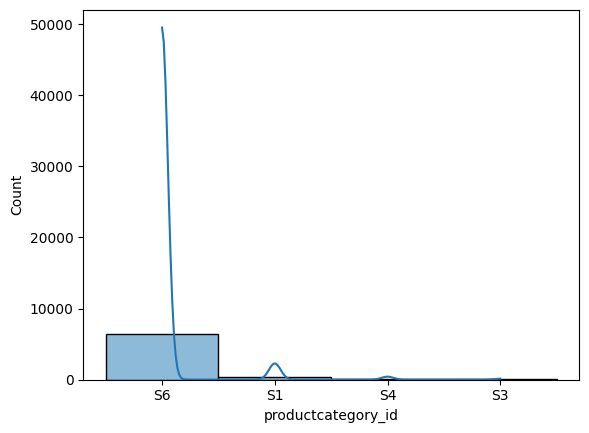

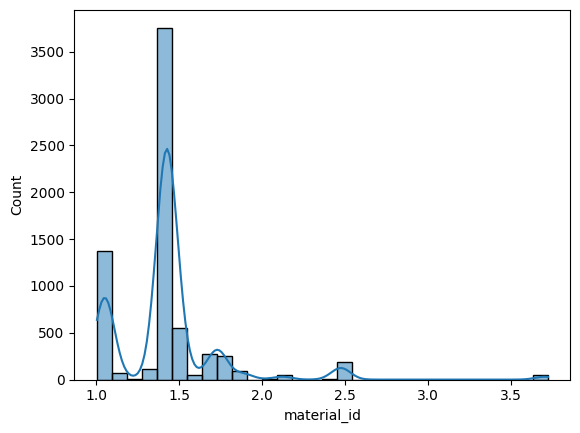

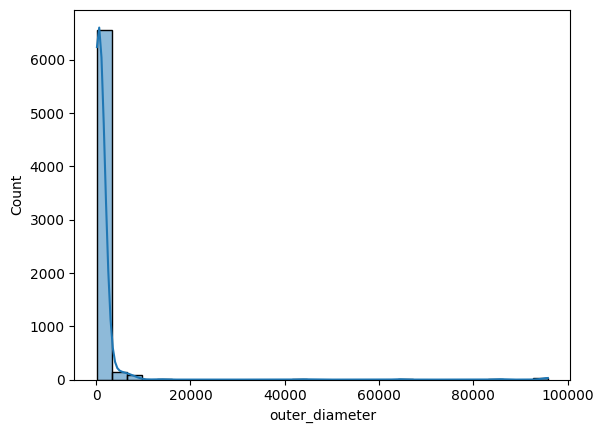

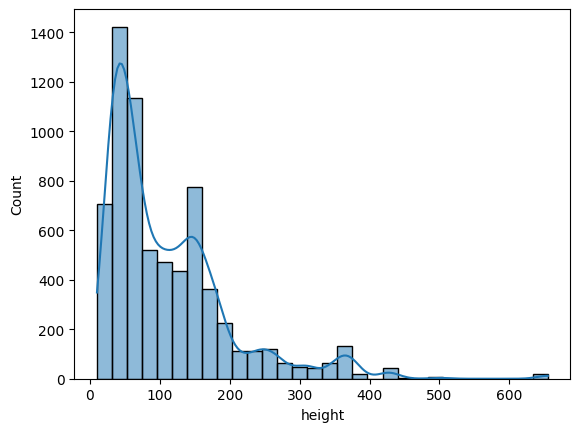

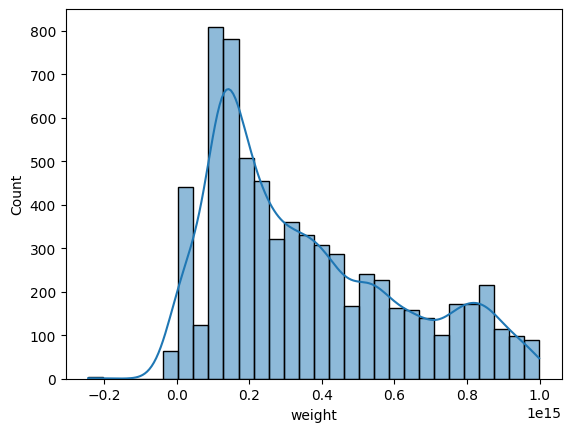

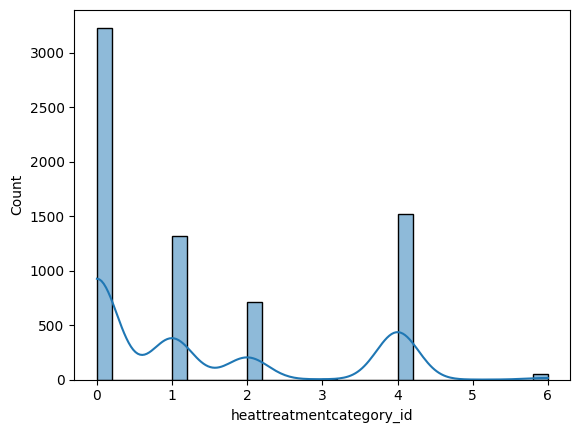

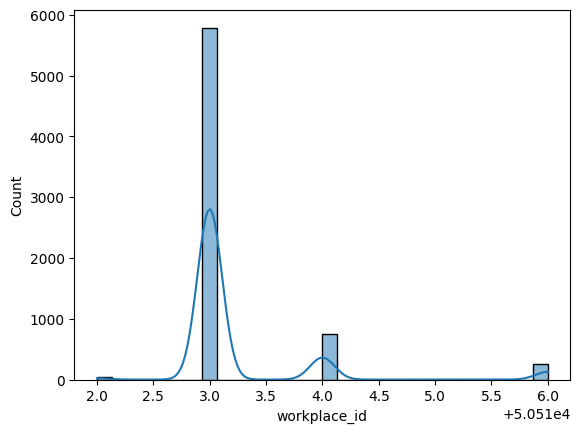

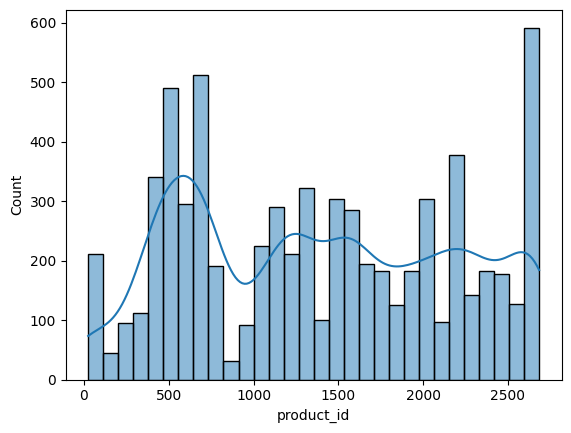

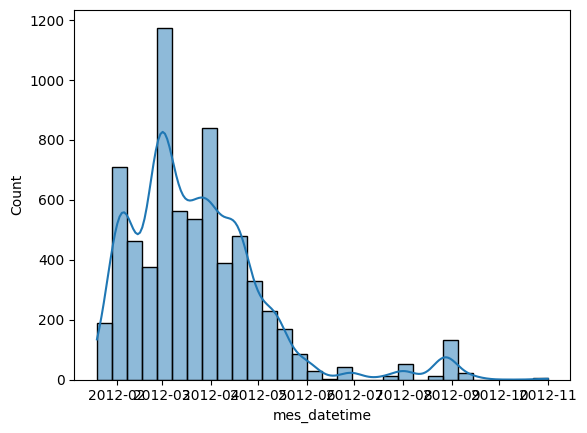

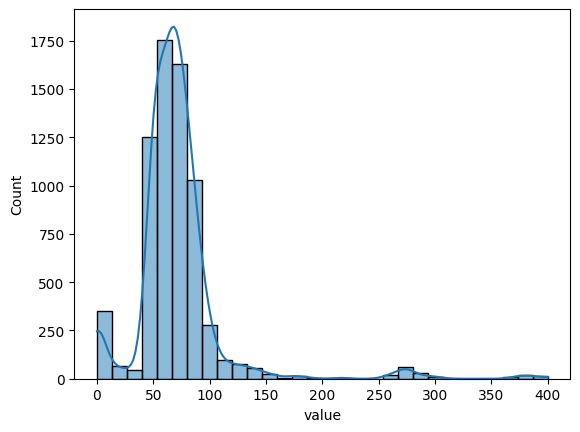

In [ ]:
for col in stainless_steel_energy.columns:
    sns.histplot(stainless_steel_energy[col], bins=30, kde=True)
    plt.show()

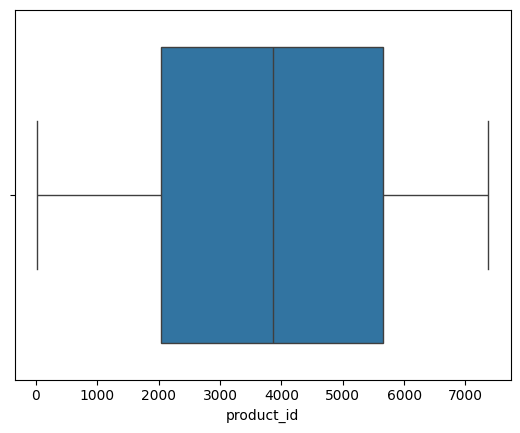

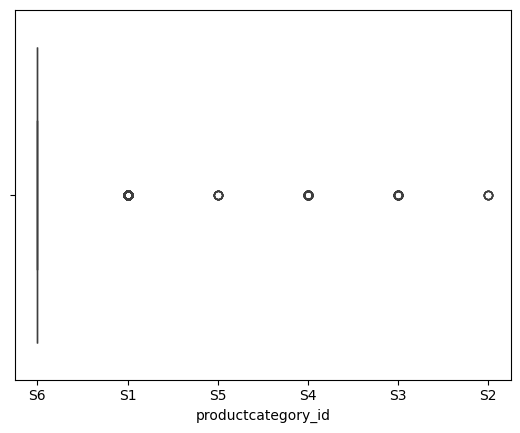

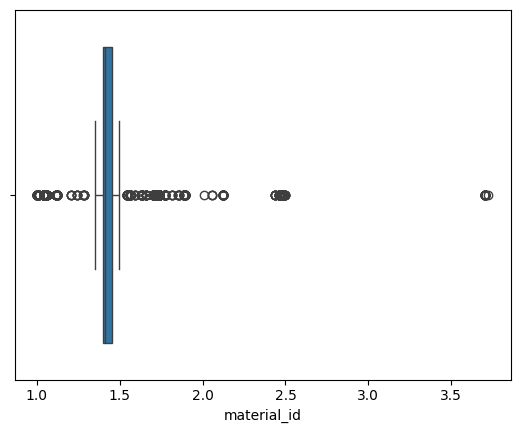

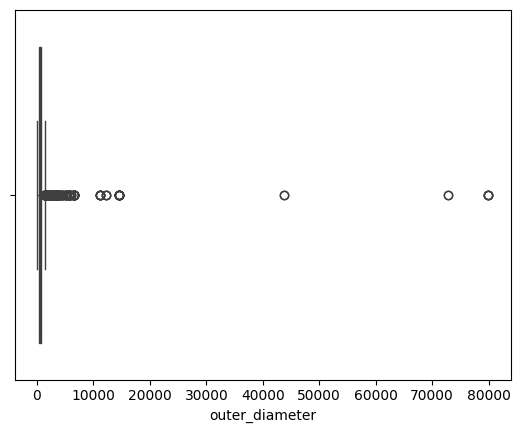

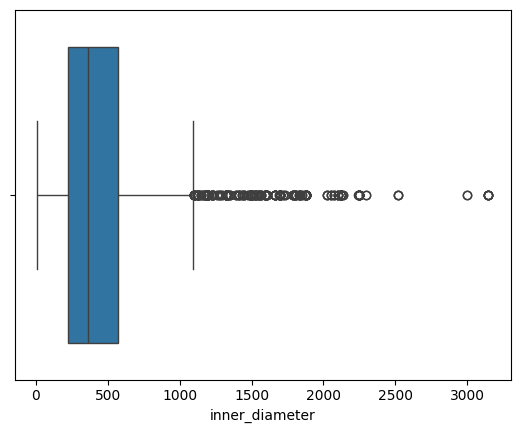

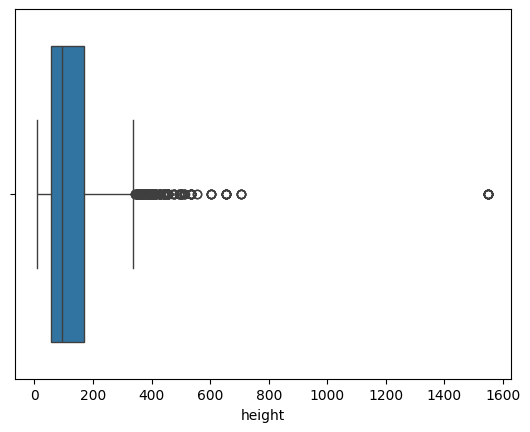

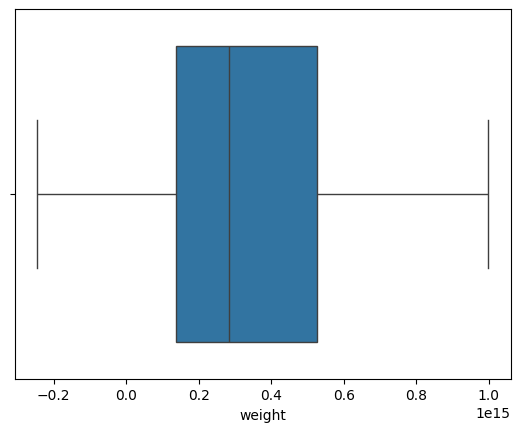

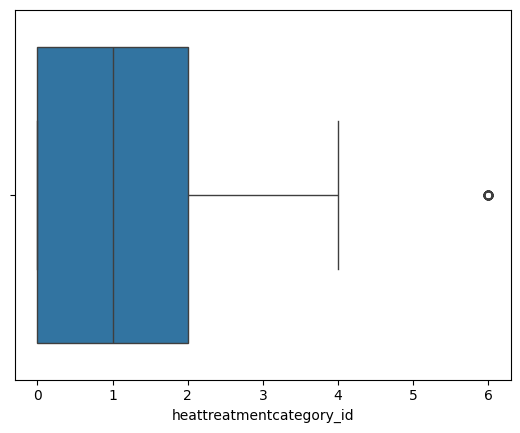

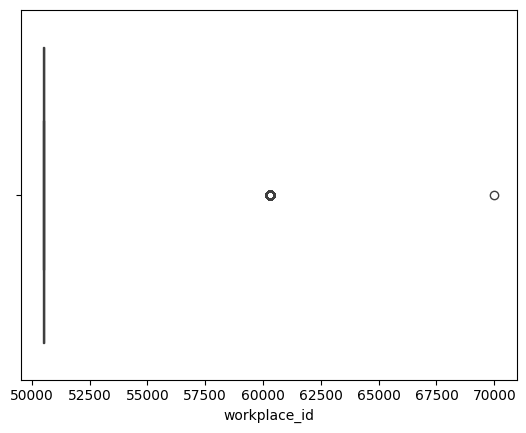

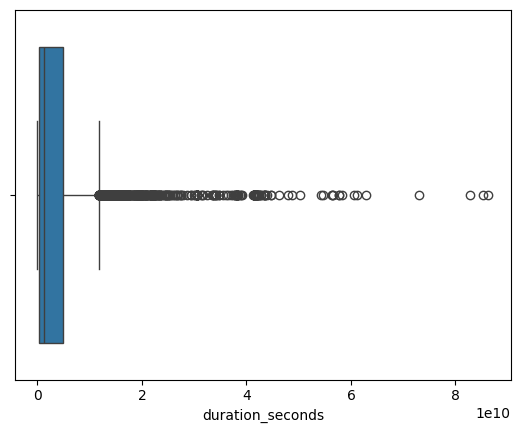

In [270]:
for col in duration.columns:
    sns.boxplot(x=duration[col])
    plt.show()

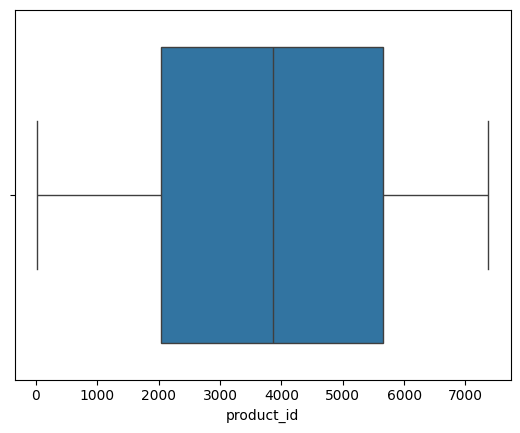

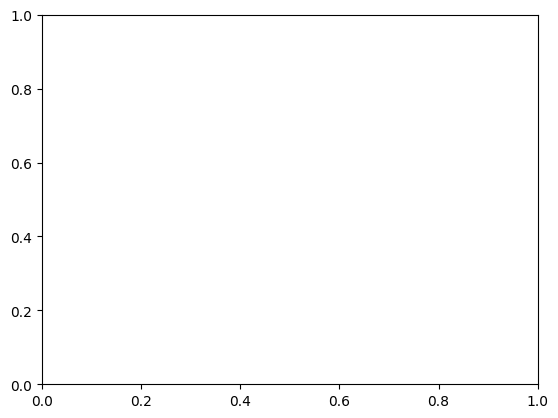

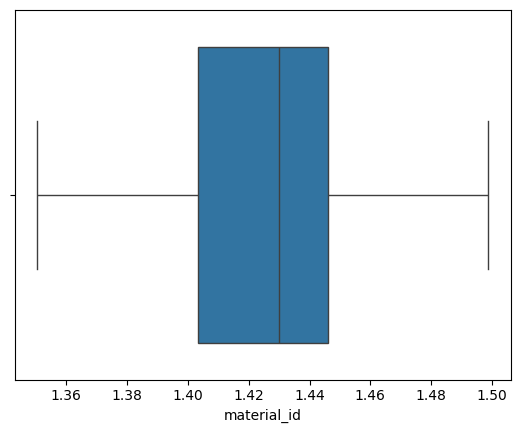

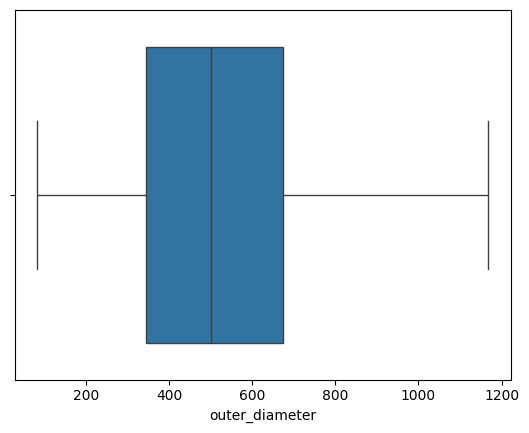

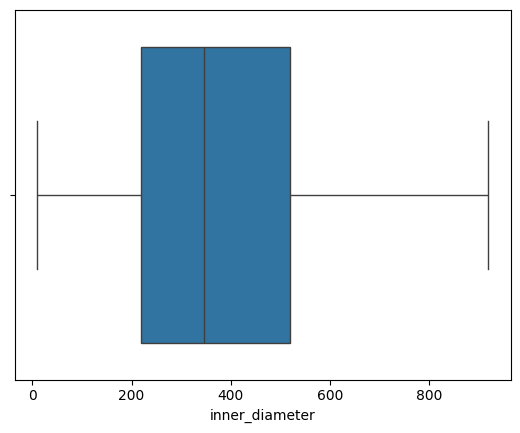

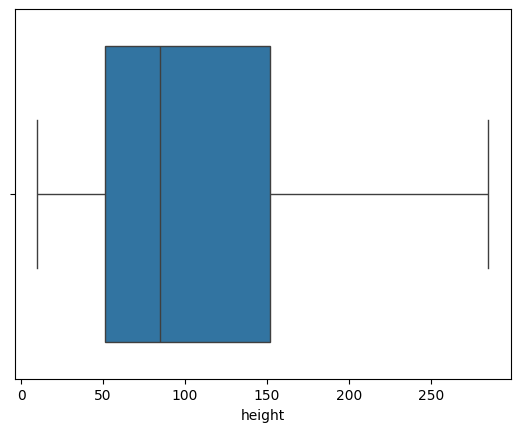

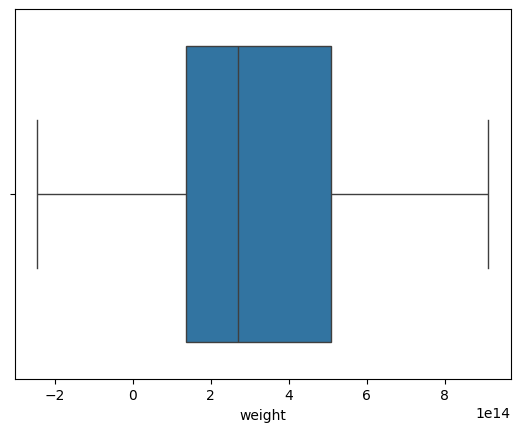

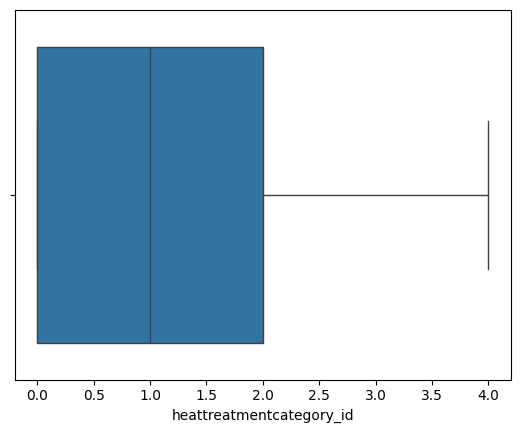

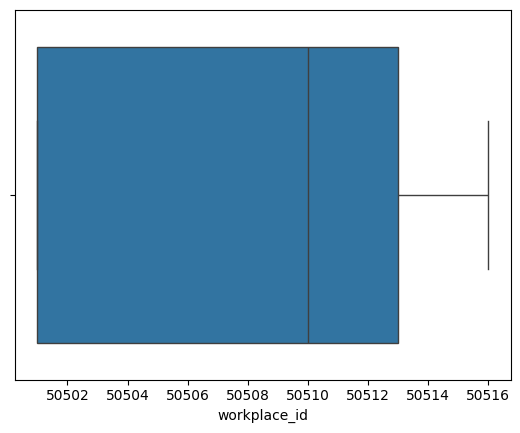

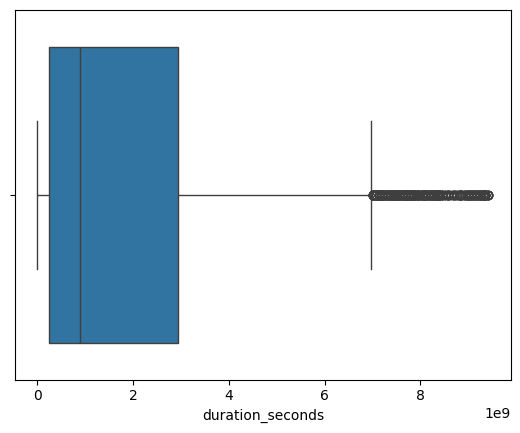

In [281]:
#removing outliers
# Remove rows with outliers basesed on IQR
for col in duration.columns:
    Q1 = duration[col].quantile(0.25)
    Q3 = duration[col].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    cleaned_duration= duration[(duration[col] >= lower_bound) & (duration[col] <= upper_bound)]
    #checking removed outliers
    sns.boxplot(x=cleaned_duration[col])
    plt.show()


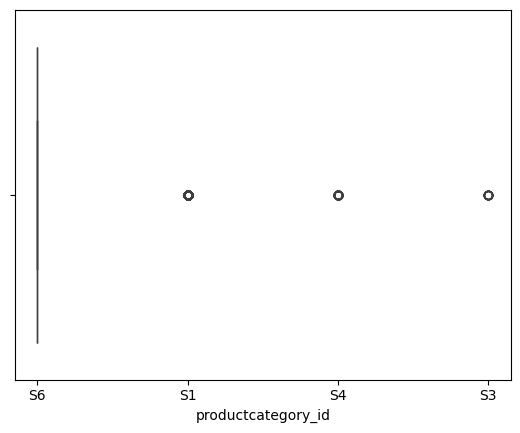

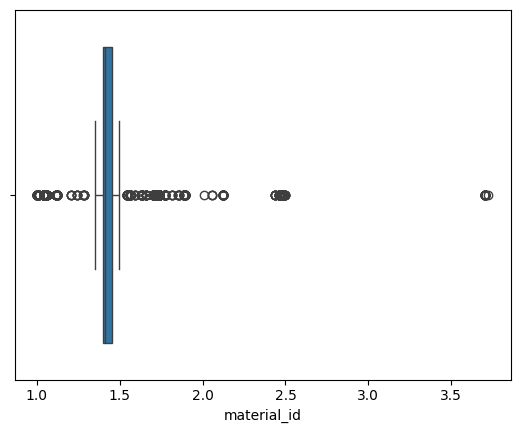

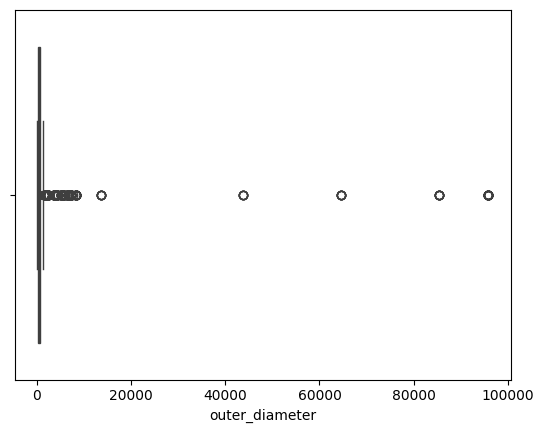

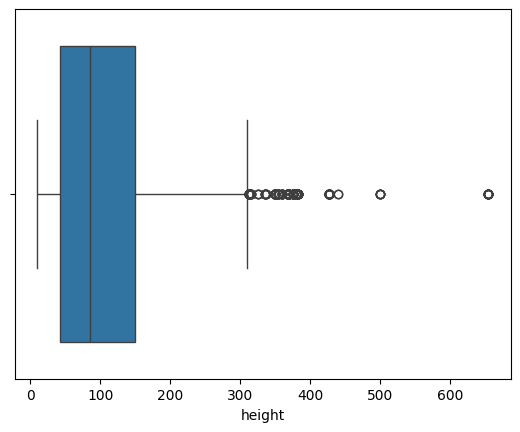

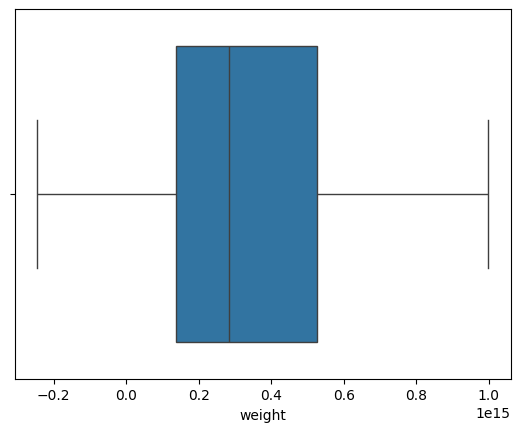

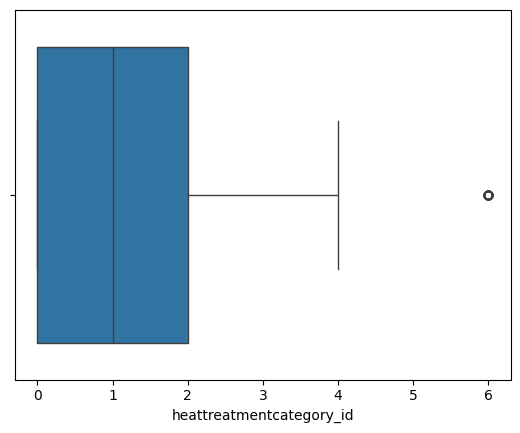

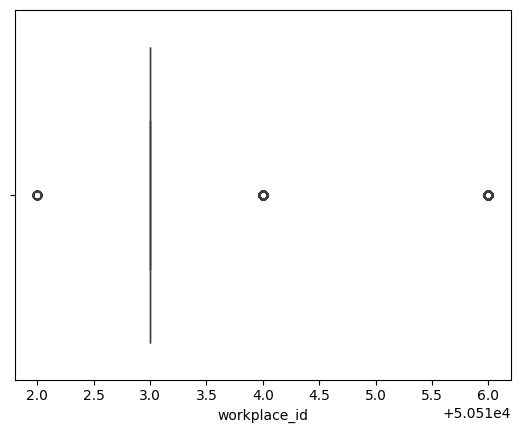

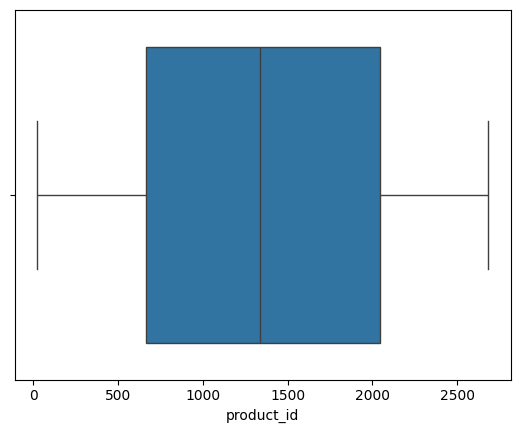

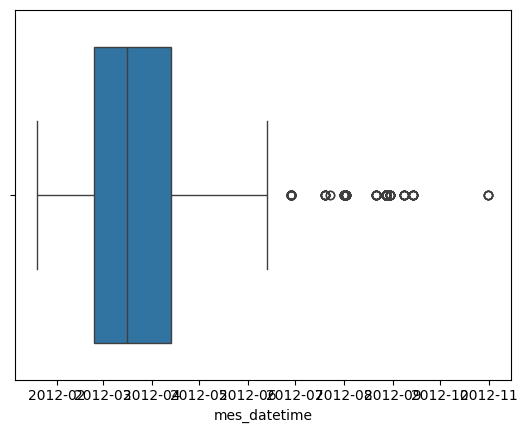

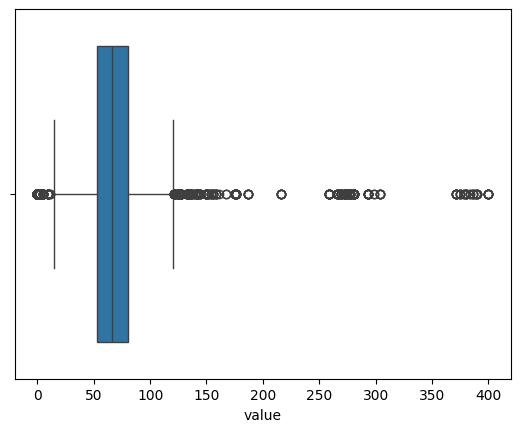

In [ ]:
for col in stainless_steel_energy.columns:
    sns.boxplot(x=stainless_steel_energy[col])
    plt.show()

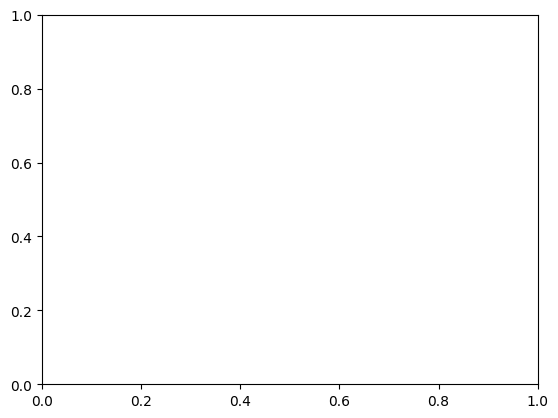

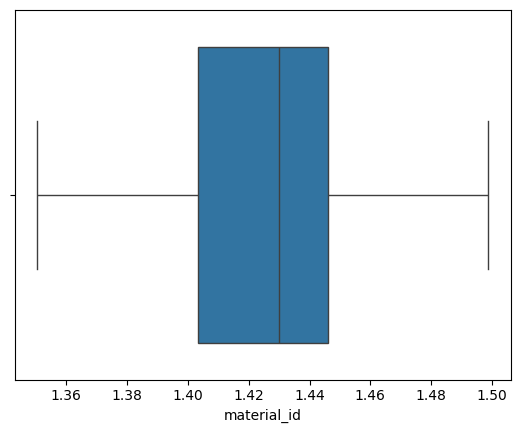

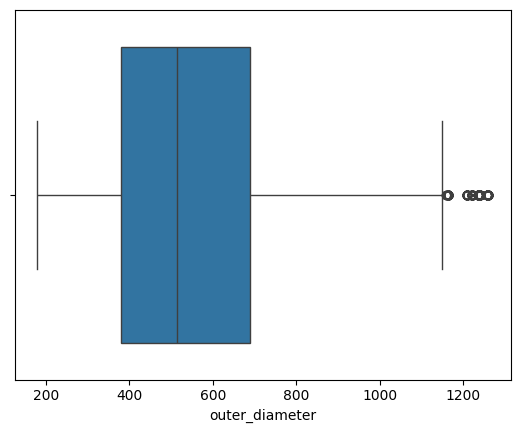

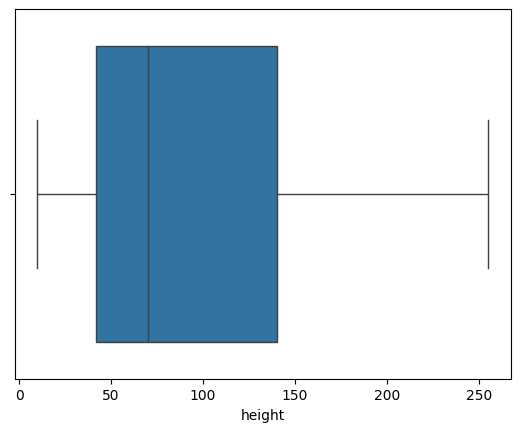

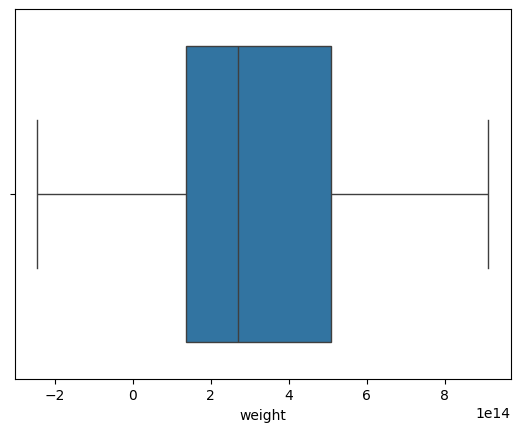

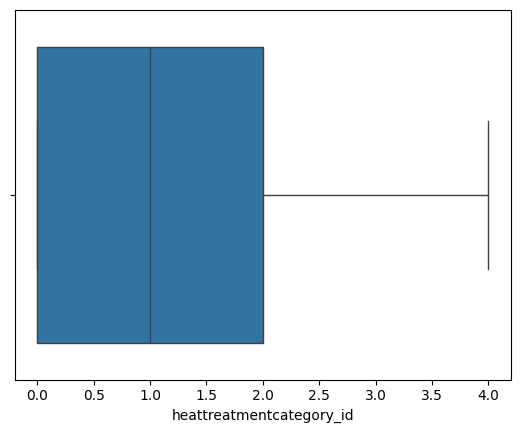

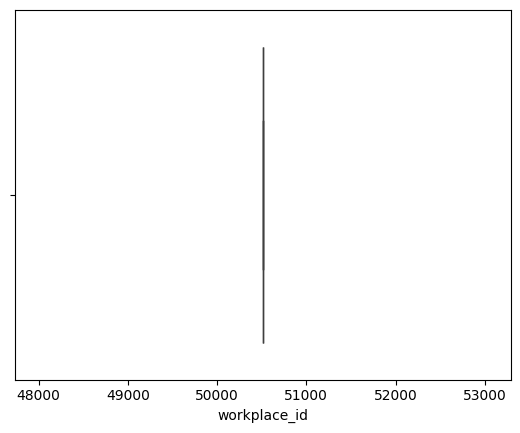

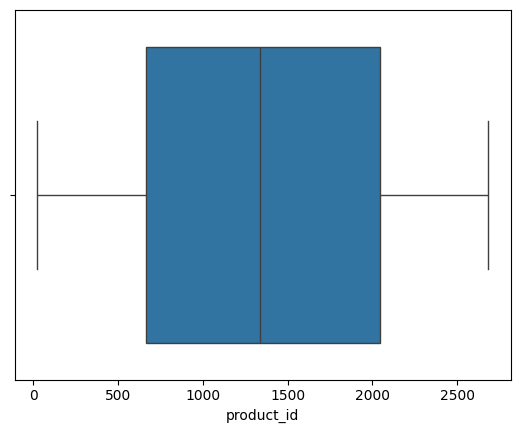

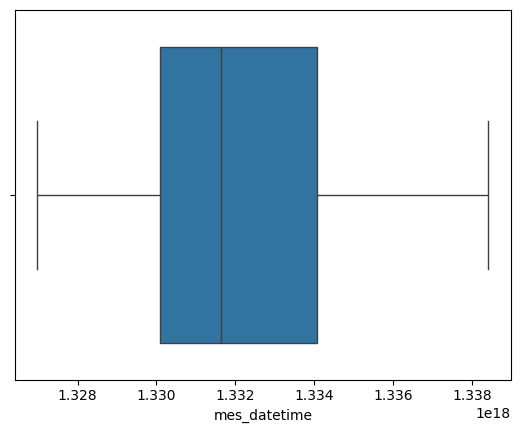

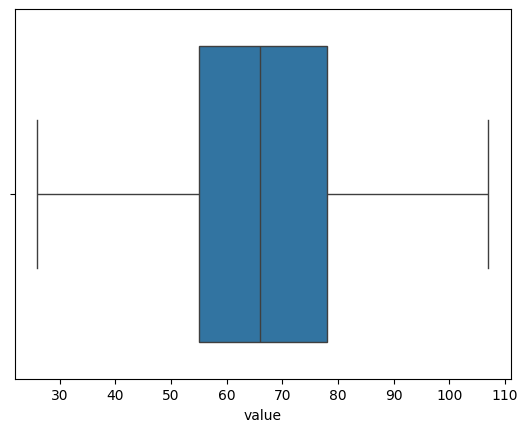

In [282]:
#removing outliers
# Remove rows with outliers basesed on IQR
for col in stainless_steel_energy.columns:
    Q1 = stainless_steel_energy[col].quantile(0.25)
    Q3 = stainless_steel_energy[col].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    cleaned_stainless_steel_energy= stainless_steel_energy[(stainless_steel_energy[col] >= lower_bound) & (stainless_steel_energy[col] <= upper_bound)]
    #checking removed outliers
    sns.boxplot(x=cleaned_stainless_steel_energy[col])
    plt.show()

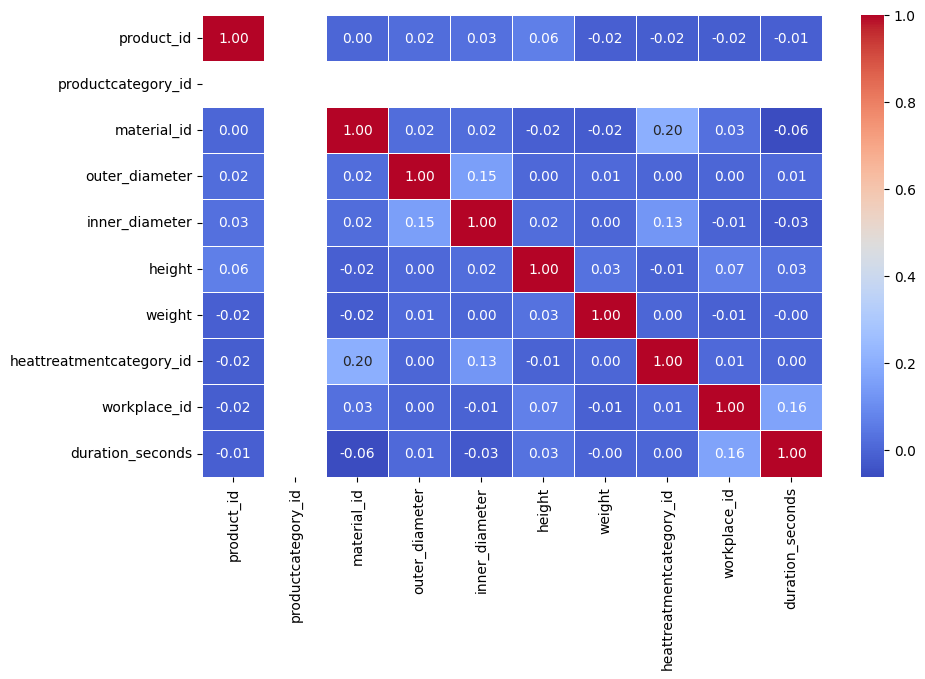

In [ ]:
# Compute correlation matrix
corr_matrix = cleaned_duration.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

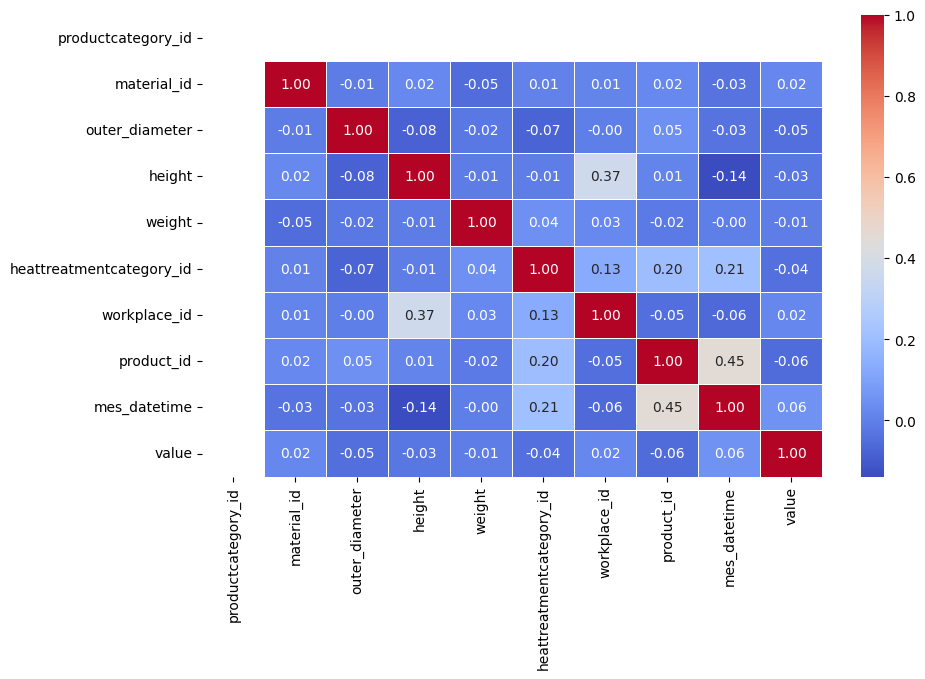

In [287]:
# Compute correlation matrix
corr_matrix = cleaned_stainless_steel_energy.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

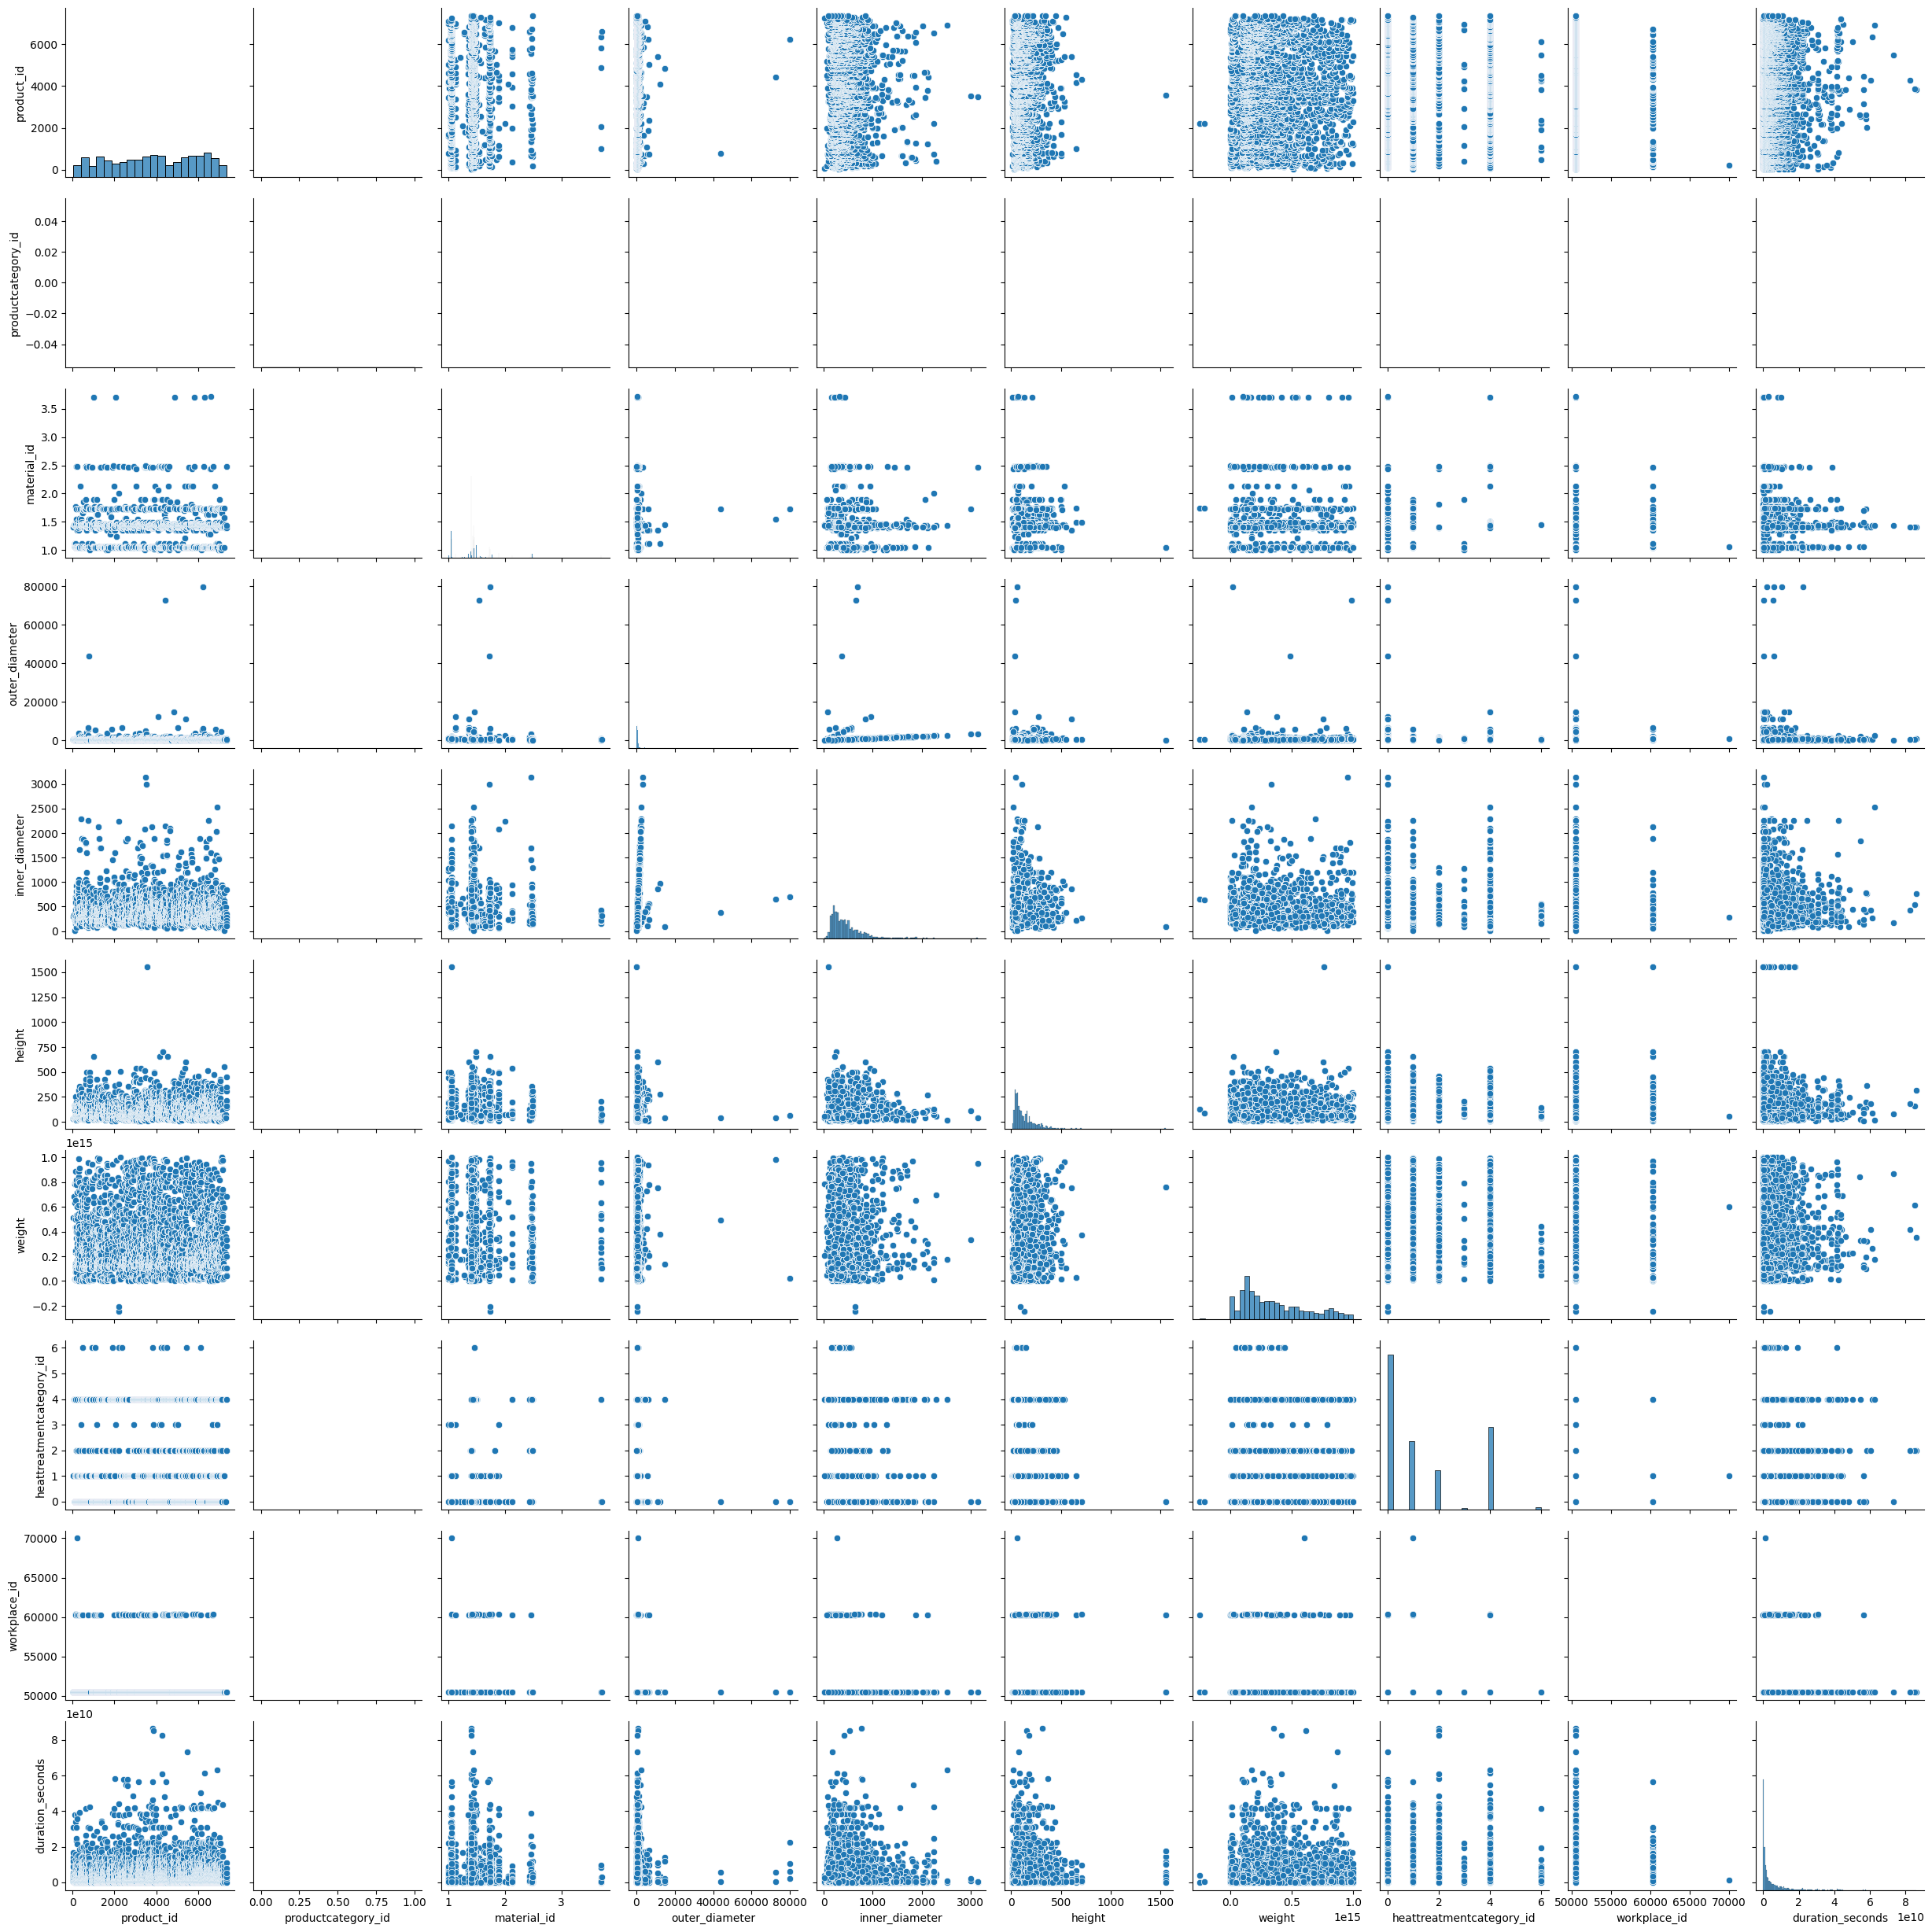

In [291]:
sns.pairplot(duration)
plt.show()

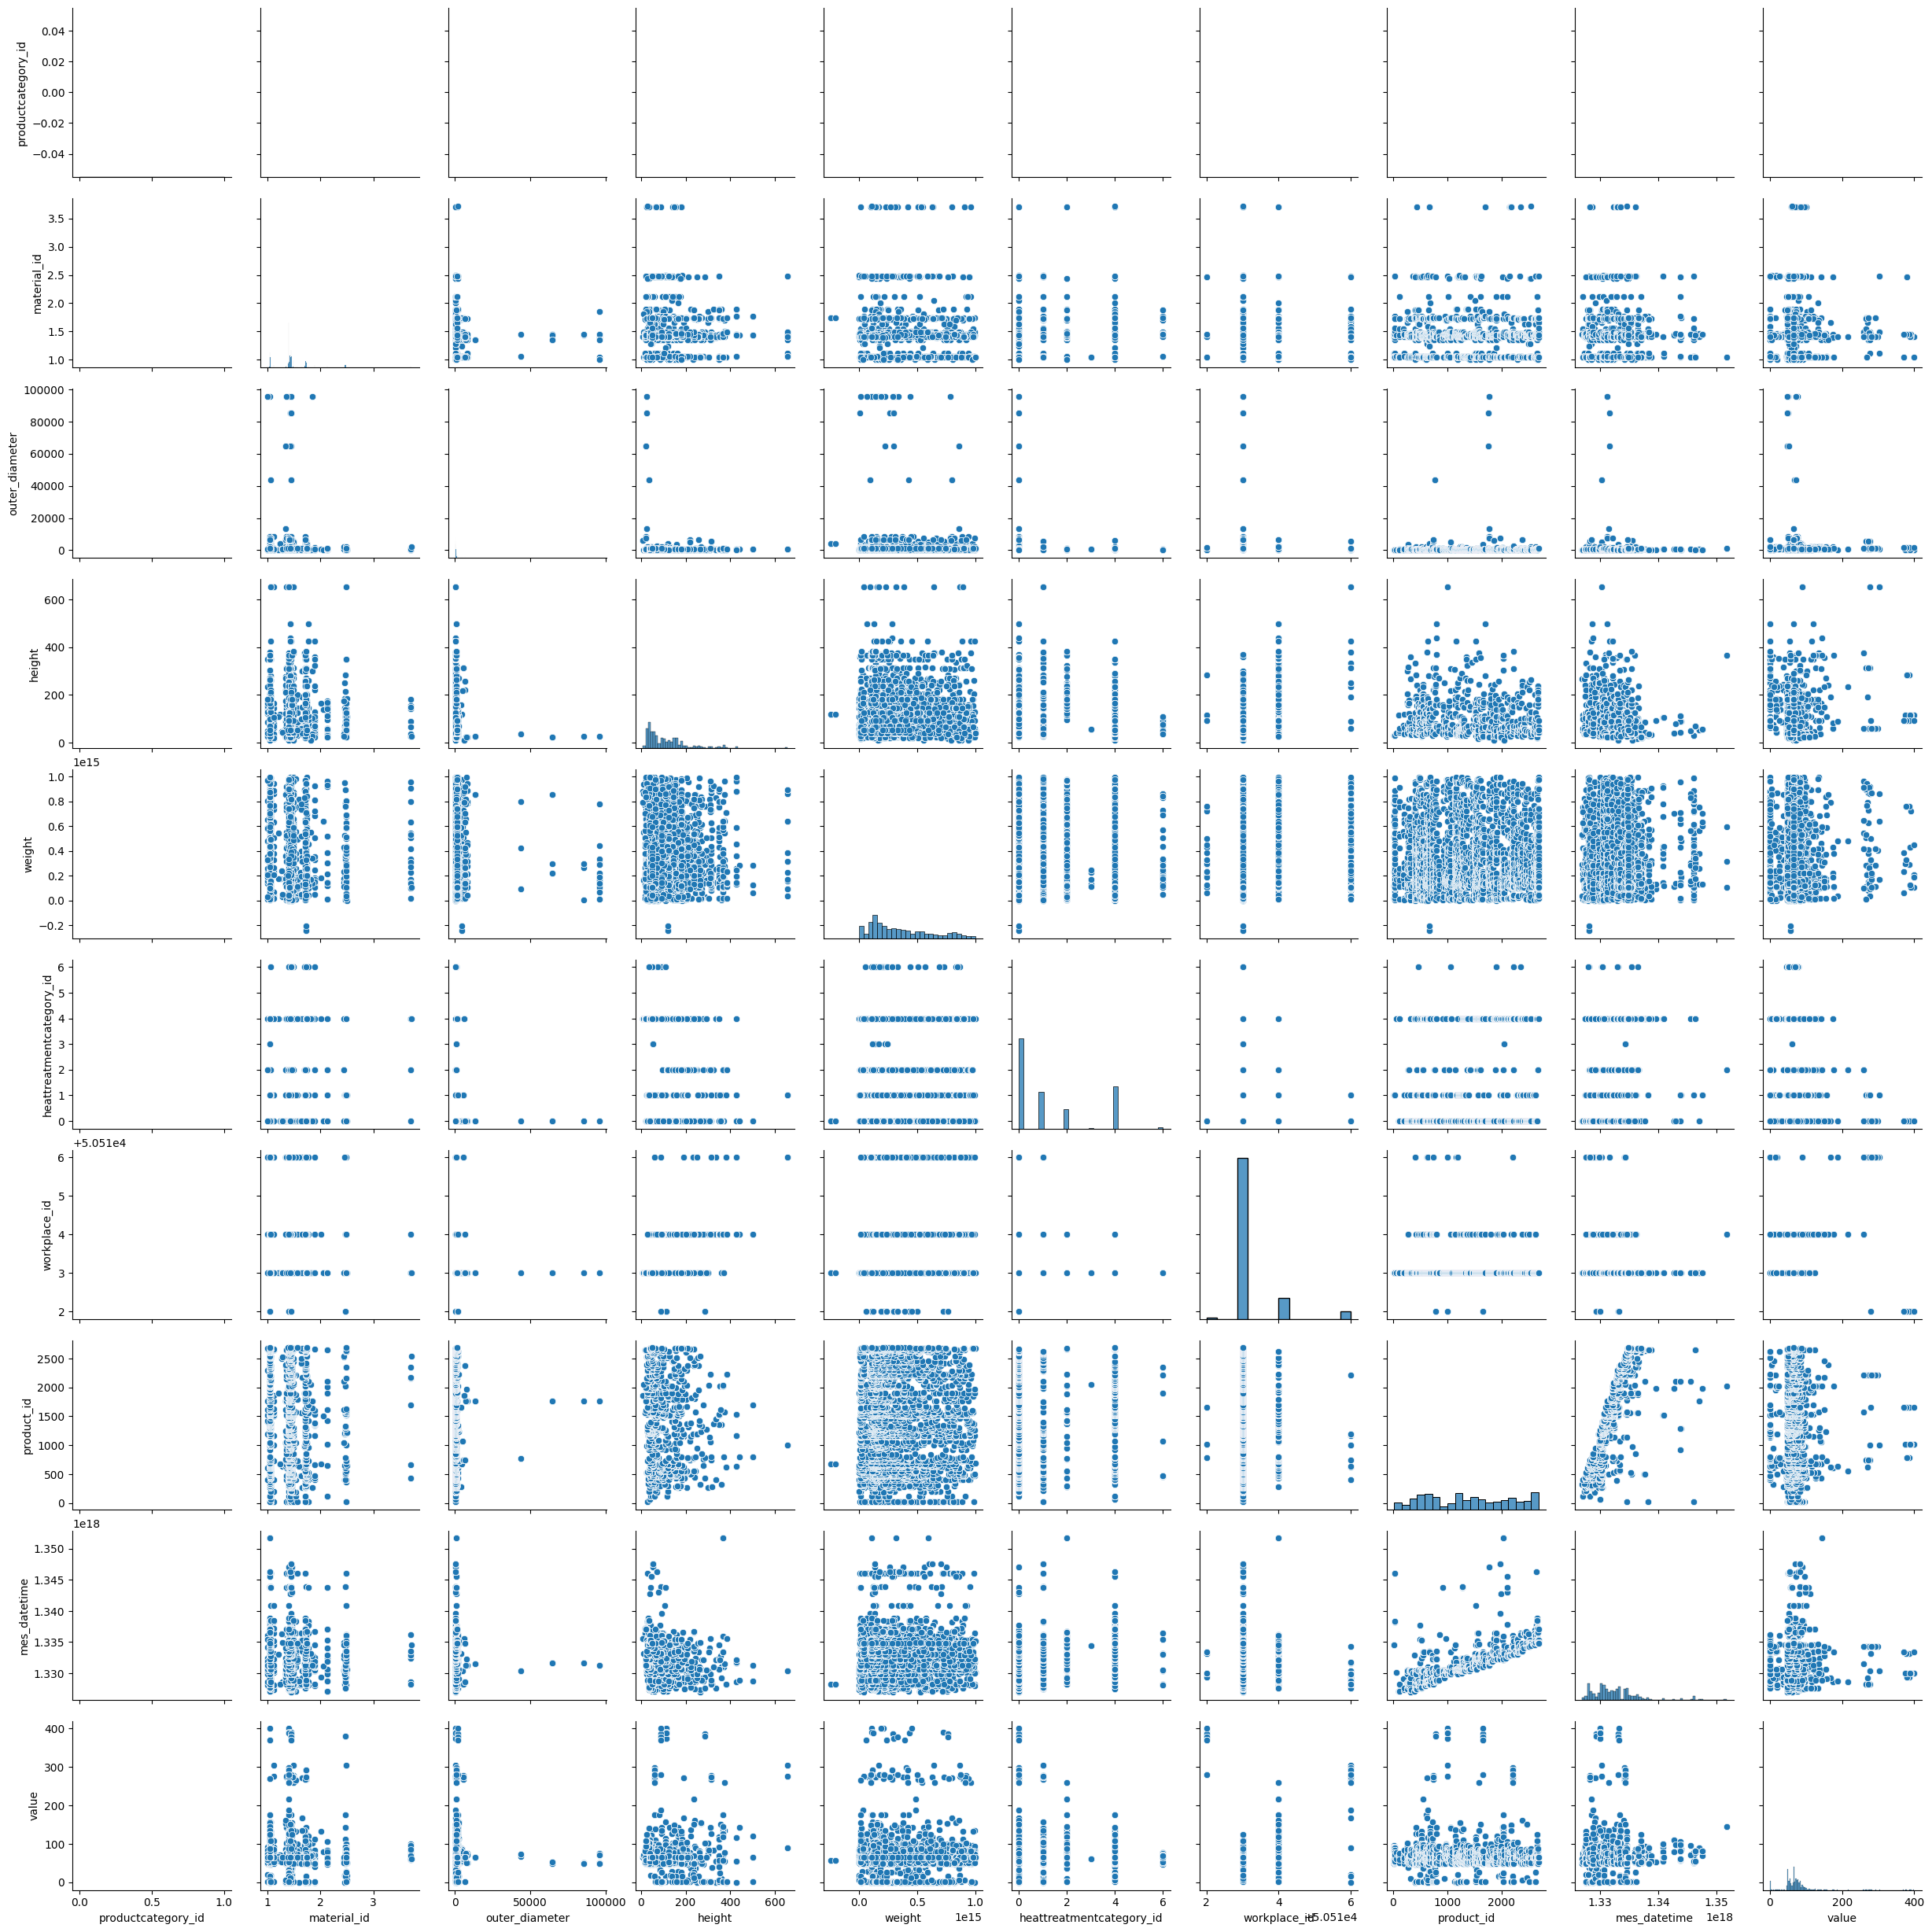

In [292]:
sns.pairplot(stainless_steel_energy)
plt.show()
